In [1]:
#Importing data
import os, numpy as np, random, pickle
os.chdir(r".")
X_train = np.load(f"data\X_train.npy")#[:10000]
Y_train = np.load(f"data\Y_train.npy")#[:10000]
_X_val  = np.load(f"data\X_val.npy"  )#[:10000]
_Y_val  = np.load(f"data\Y_val.npy"  )#[:10000]

import numpy as np
from sklearn.preprocessing import StandardScaler

# Instantiate and fit the scaler
scaler_X = StandardScaler()
scaler_X.fit(np.concatenate((X_train,_X_val)))
X_train = scaler_X.transform(X_train)
_X_val = scaler_X.transform(_X_val)
with open(f'data\scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)


In [2]:
#Preparing data
import torch
from X_999_functions_and_classes import MyDataset
dataset = MyDataset(X_train,Y_train)
# Convert data to PyTorch tensors
X_val = torch.tensor(_X_val, dtype=torch.float32)
Y_val = torch.tensor(_Y_val, dtype=torch.float32)
# Print dataset shapes
print(f'Training data shape: {X_train.shape}, {Y_train.shape}')
print(f'Validation data shape: {X_val.shape}, {Y_val.shape}')

Training data shape: (152932, 2), (152932, 2)
Validation data shape: torch.Size([16993, 2]), torch.Size([16993, 2])


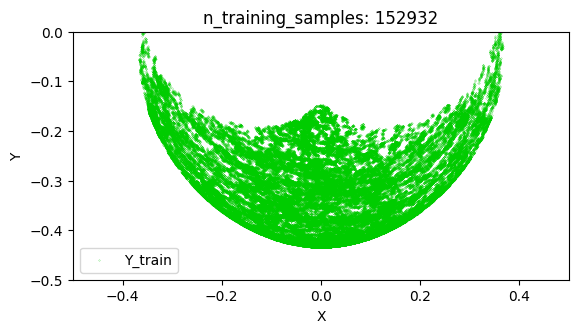

In [3]:
#Plot training data
import matplotlib.pyplot as plt
import numpy as np

x_values, y_values = zip(*Y_train[:,-2:])
plt.scatter(x_values, y_values,marker=".",color=[[0,0.8,0]],s=0.1,label="Y_train")

x_range_all=(-0.5, 0.5)
y_range_all=(-0.5, 0)

plt.title(f"n_training_samples: {len(x_values)}")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0)
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

In [4]:
#Train the network
from X_999_functions_and_classes import train_nn

model,criterion,loss = train_nn(learning_rate   = 0.01,                 #change parameters here
                                batch_size      = 32,                   #change parameters here
                                layers          = [16,16],              #change parameters here
                                epochs          = 2,                    #change parameters here
                                dataset         = dataset,              
                                X_val           = X_val,
                                Y_val           = Y_val,
                                input_size      = len(X_val[0]),
                                output_size     = len(Y_val[0]),)
print(loss)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=2, bias=True)
  )
)
Epoch    0 | epoch_loss   0.002769 | validation_loss   0.000349
Epoch    1 | epoch_loss   0.000271 | validation_loss   0.000223
0.00022277949028648436


In [5]:
#preprocess validation set
# scale the X values for predicting
X_val_2_scaled = scaler_X.transform(X_val)
X_val_2_scaled = torch.tensor(X_val_2_scaled, dtype=torch.float32)
#do prediction
model.eval() # Set the model to evaluation mode
with torch.no_grad():
    # Forward pass for validation set
    Y_predicted = model(X_val)

Text(0.5, 1.0, '')

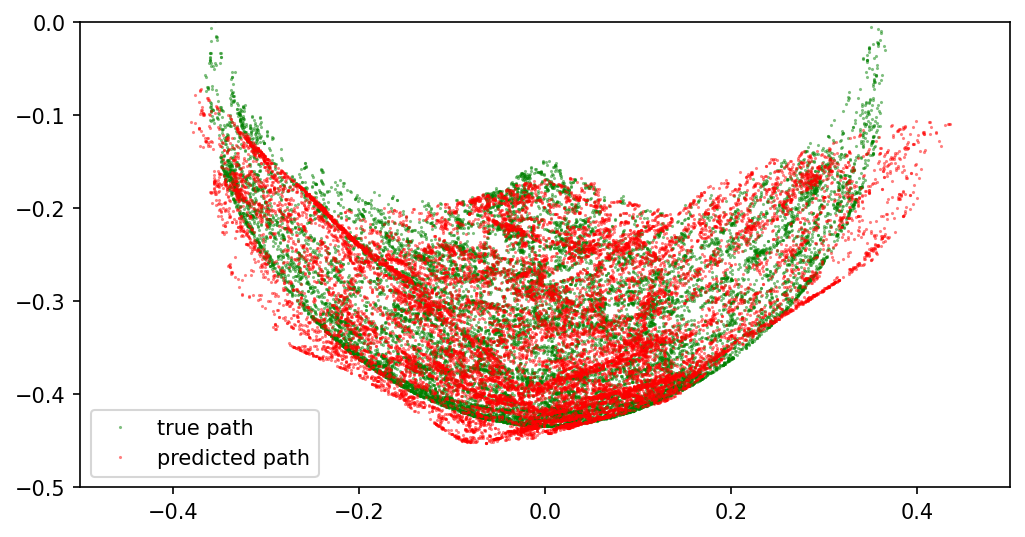

In [13]:
#plot overview validation set
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8), dpi=150)
ax = fig.add_subplot(111) 
ax.plot(Y_val[:,-2],Y_val[:,-1],color='green',linestyle='None',marker='.',markersize=1,linewidth=3,alpha=0.5,label="true path") 
Y_predicted_plot = np.array(Y_predicted[0])
ax.plot(Y_predicted[:,-2],Y_predicted[:,-1],color='red',linestyle='None',marker='.',markersize=1,linewidth=3,alpha=0.5,label="predicted path") 
limits=[-0.5,0.5,-0.5,0.0]
xlim_lower,xlim_upper,ylim_lower,ylim_upper = limits
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([xlim_lower, xlim_upper])
#ax.set_xticks(np.arange(xlim_lower,xlim_upper+1,500))
ax.set_ylim([ylim_lower, ylim_upper])
#ax.set_yticks(np.arange(ylim_lower,ylim_upper+1,500))
ax.legend()
ax.set_title(f"")

Text(0.5, 1.0, '')

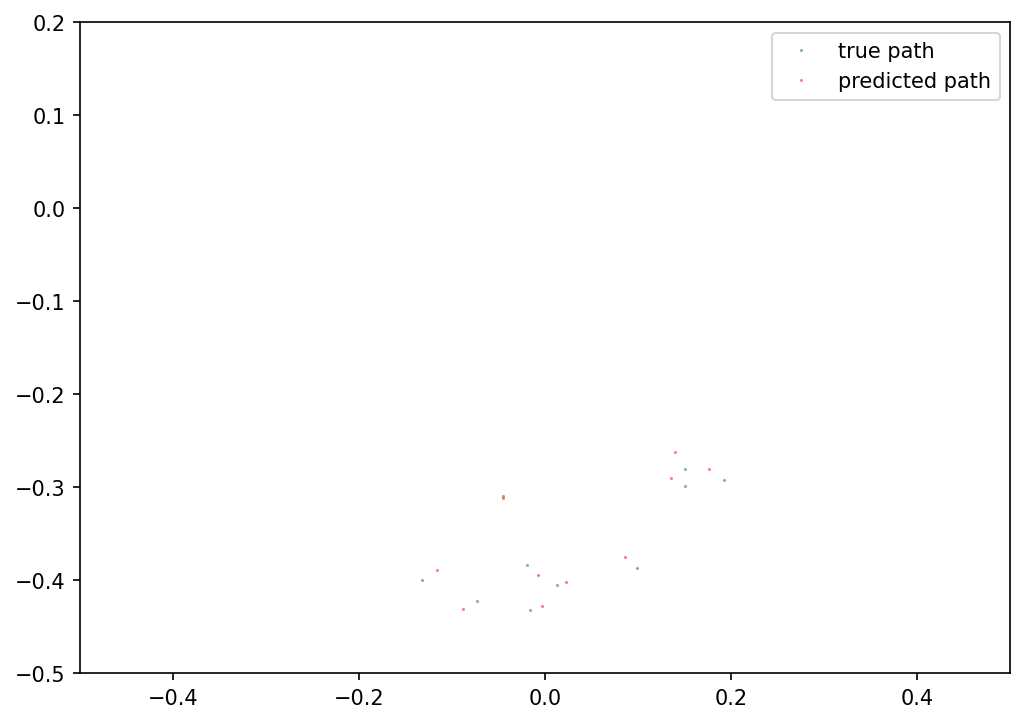

In [12]:
#plot detail validation set
import matplotlib.pyplot as plt

start_index = 10
end_index = 20


fig = plt.figure(figsize=(8, 8), dpi=150)
ax = fig.add_subplot(111) 
ax.plot(Y_val[start_index:end_index,0::2],Y_val[start_index:end_index,1::2],color='green',linestyle='None',marker='.',markersize=1,linewidth=3,alpha=0.5,label="true path") 
Y_predicted_plot = np.array(Y_predicted[0])
ax.plot(Y_predicted[start_index:end_index,0::2],Y_predicted[start_index:end_index,1::2],color='red',linestyle='None',marker='.',markersize=1,linewidth=3,alpha=0.5,label="predicted path") 
limits=[-0.5,0.5,-0.5,0.2]
xlim_lower,xlim_upper,ylim_lower,ylim_upper = limits
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([xlim_lower, xlim_upper])
#ax.set_xticks(np.arange(xlim_lower,xlim_upper+1,500))
ax.set_ylim([ylim_lower, ylim_upper])
#ax.set_yticks(np.arange(ylim_lower,ylim_upper+1,500))
ax.legend()
ax.set_title(f"")